### 데이터 

In [161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install scikit-learn==1.0.

     |████████████████████████████████| 23.1 MB 1.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [ ]:
import pandas as pd

In [ ]:
data_2017 = pd.read_excel('../content/drive/MyDrive/project3-data/seoul_accident_2017.xls')
data_2018 = pd.read_excel('../content/drive/MyDrive/project3-data/seoul_accident_2018.xls')
data_2019 = pd.read_excel('../content/drive/MyDrive/project3-data/seoul_accident_2019.xls')
data_2020 = pd.read_excel('../content/drive/MyDrive/project3-data/seoul_accident_2020.xls')

In [ ]:
temp_data_2017 = pd.read_csv('../content/drive/MyDrive/project3-data/seoul_temp_2017.csv', encoding='cp949', skiprows=8)
temp_data_2018 = pd.read_csv('../content/drive/MyDrive/project3-data/seoul_temp_2018.csv', encoding='cp949', skiprows=8)
temp_data_2019 = pd.read_csv('../content/drive/MyDrive/project3-data/seoul_temp_2019.csv', encoding='cp949', skiprows=8)
temp_data_2020 = pd.read_csv('../content/drive/MyDrive/project3-data/seoul_temp_2020.csv', encoding='cp949', skiprows=8)

In [ ]:
test = pd.read_excel('../content/drive/MyDrive/project3-data/case_2019.xls')
test.head()

,시도,사고월,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9,2019.10,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16,2019.17,2019.18,2019.19,2019.20,2019.21,2019.22,2019.23,2019.24,2019.25,2019.26,2019.27,2019.28,2019.29,2019.30,2019.31
0,시도,사고월,합계,01일,02일,03일,04일,05일,06일,07일,08일,09일,10일,11일,12일,13일,14일,15일,16일,17일,18일,19일,20일,21일,22일,23일,24일,25일,26일,27일,28일,29일,30일,31일
1,서울,01월,2983,62,96,102,100,95,52,88,111,99,100,112,94,71,101,95,96,103,103,88,92,92,104,98,108,128,99,65,113,103,113,100
2,서울,02월,2482,111,69,70,47,38,48,90,88,68,63,82,94,103,119,123,102,111,98,79,88,108,114,114,74,104,96,78,103,-,-,-
3,서울,03월,3099,81,80,66,77,76,95,111,123,116,70,97,104,122,105,139,104,80,97,96,133,106,97,128,98,92,101,82,104,126,122,71
4,서울,04월,3283,118,125,108,119,121,107,104,105,116,130,114,109,136,74,113,115,108,91,132,96,88,106,98,114,119,129,104,80,92,112,-


### 전처리, EDA

#### 서울시 사고데이터 2017 ~ 2020 / Target = 부상자+사망자수

In [ ]:
data_2017.head()

,시도,사고월,사고년도,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11,2017.12,2017.13,2017.14,2017.15,2017.16,2017.17,2017.18,2017.19,2017.20,2017.21,2017.22,2017.23,2017.24,2017.25,2017.26,2017.27,2017.28,2017.29,2017.30,2017.31
0,시도,사고월,사고년도,합계,01일,02일,03일,04일,05일,06일,07일,08일,09일,10일,11일,12일,13일,14일,15일,16일,17일,18일,19일,20일,21일,22일,23일,24일,25일,26일,27일,28일,29일,30일,31일
1,서울,01월,사망자수,33,2,4,1,1,1,2,0,1,0,1,0,1,2,0,1,3,1,1,1,2,1,2,0,0,2,1,1,0,0,1,0
2,서울,01월,부상자수,4692,125,136,118,163,153,133,169,113,108,144,187,163,171,179,172,183,115,155,126,94,169,137,216,252,245,222,100,101,117,109,117
3,서울,02월,사망자수,26,1,1,3,0,3,0,0,0,0,0,2,2,2,0,0,1,0,2,1,1,0,0,2,2,0,0,2,1,-,-,-
4,서울,02월,부상자수,3883,96,113,155,135,123,129,112,148,134,150,151,145,168,118,127,118,171,215,119,147,120,132,141,136,200,123,125,132,-,-,-


In [ ]:
temp_data_2017.head()

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각일교차
108,서울,2017-01-01,2.7,6.9,14:19,-1.6,05:40,8.5
108,서울,2017-01-02,5.0,9.2,13:55,1.8,23:55,7.4
108,서울,2017-01-03,2.0,7.7,14:44,-2.3,07:31,10.0
108,서울,2017-01-04,3.9,8.9,15:19,1.0,00:01,7.9
108,서울,2017-01-05,3.8,7.3,14:44,-0.1,03:16,7.4


In [ ]:
def test(df):
  year = df.columns[3]
  df = df[:25].drop([year,'시도','사고년도'], axis=1, errors='ignore').iloc[1:-1]
  df = df.melt(id_vars='사고월', value_vars=list(df.columns[1:]), var_name = 'day', value_name= 'injured')
  df = df.replace({'월': '', '일':'', year + '.': ''}, regex=True)
  df['year'] = year
  df['date'] = df[['year','사고월','day']].agg('/'.join, axis=1)
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
  df.dropna(how='any', inplace=True)
  df['injured'] = df['injured'].astype(int)
  df = df[['date','injured']]
  return df

In [ ]:
data_2017 = test(data_2017)
data_2018 = test(data_2018)
data_2019 = test(data_2019)
data_2020 = test(data_2020)

In [ ]:
data_17to20 = pd.concat([data_2017,data_2018,data_2019,data_2020])
data_17to20.sort_values(by='date') # date인덱스로 나중에 변경
data_17to20 = data_17to20.groupby('date').sum().reset_index()

In [ ]:
data_17to20

,date,injured
0,2017-01-01,127
1,2017-01-02,140
2,2017-01-03,119
3,2017-01-04,164
4,2017-01-05,154
...,...,...
1456,2020-12-27,0
1457,2020-12-28,0
1458,2020-12-29,0
1459,2020-12-30,2


In [ ]:
#data_17to20.duplicated(keep='last')
data_17to20.info() 
# Time period between January 1, 2017 and December 31, 2020 (inclusive) equals to:
# 1461 days
# ... or 208 weeks & 5 days
# ... or 4 years

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1461 non-null   datetime64[ns]
 1   injured  1461 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 23.0 KB


#### 사고 데이터 2017 ~ 2020

In [ ]:
case_2017 = pd.read_excel('../content/drive/MyDrive/project3-data/case_2017.xls')
case_2018 = pd.read_excel('../content/drive/MyDrive/project3-data/case_2018.xls')
case_2019 = pd.read_excel('../content/drive/MyDrive/project3-data/case_2019.xls')
case_2020 = pd.read_excel('../content/drive/MyDrive/project3-data/case_2020.xls')

In [ ]:
def clean_case(df):
  year = df.columns[2]
  df = df[:25].drop([year,'시도'], axis=1, errors='ignore').iloc[1:-1]
  df = df.melt(id_vars='사고월', value_vars=list(df.columns[1:]), var_name = 'day', value_name= 'case')
  df = df.replace({'월': '', '일':'', year + '.': ''}, regex=True)
  df['year'] = year
  df['date'] = df[['year','사고월','day']].agg('/'.join, axis=1)
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
  df.dropna(how='any', inplace=True)
  df['case'] = df['case'].astype(int)
  df = df[['date','case']]
  return df

In [ ]:
case_2017 = clean_case(case_2017)
case_2018 = clean_case(case_2018)
case_2019 = clean_case(case_2019)
case_2020 = clean_case(case_2020)

In [ ]:
case_17to20 = pd.concat([case_2017,case_2018,case_2019,case_2020])
case_17to20.sort_values(by='date') # date인덱스로 나중에 변경
case_17to20 = case_17to20.groupby('date').sum().reset_index()

In [ ]:
case_17to20.head()

,date,case
0,2017-01-01,73
1,2017-01-02,82
2,2017-01-03,88
3,2017-01-04,115
4,2017-01-05,103


In [162]:
case_17to20.describe()

,case
count,1461.000000
mean,103.973306
std,20.933946
min,38.000000
25%,91.000000
50%,105.000000
75%,118.000000
max,184.000000


In [ ]:
case_17to20 = case_17to20.set_index('date',drop=True)

In [ ]:
case_17to20.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2017-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   case    1461 non-null   int64
dtypes: int64(1)
memory usage: 22.8 KB


In [ ]:
case_17to20.to_csv('case_data.csv')

#### 서울시 기온 데이터 2017 ~ 2020

In [ ]:
temp_data = pd.concat([temp_data_2017, temp_data_2018,temp_data_2019,temp_data_2020])

In [ ]:
temp_data = temp_data.iloc[:,1:].reset_index(drop=True) # 날짜, 평균기온

In [ ]:
temp_df = temp_data.set_axis(['date','averagetemp','hightemp','hightime','lowtemp','lowtime','tempdiff'], axis=1)

In [ ]:
temp_df = temp_df.drop(['hightime', 'lowtime'], axis = 1)

In [ ]:
temp_df['date'] = pd.to_datetime(temp_df['date'])

In [ ]:
temp_df = temp_df.fillna(0)

In [ ]:
#temp_df2 = temp_df.set_index('date',drop=True)
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1461 non-null   datetime64[ns]
 1   averagetemp  1461 non-null   float64       
 2   hightemp     1461 non-null   float64       
 3   lowtemp      1461 non-null   float64       
 4   tempdiff     1461 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [ ]:
temp_df.dtypes

date           datetime64[ns]
averagetemp           float64
hightemp              float64
lowtemp               float64
tempdiff              float64
dtype: object

In [ ]:
seoul_data = pd.merge(temp_df, data_17to20, how='inner', on='date')
seoul_data = seoul_data.set_index('date',drop=True)
seoul_data_for_project = seoul_data[['hightemp','lowtemp','injured']]

In [159]:
rounded_seoul_data = seoul_data_for_project.round(decimals=2)
rounded_seoul_data

,hightemp,lowtemp,injured
date,,,
2017-01-01,6.9,-1.6,127
2017-01-02,9.2,1.8,140
2017-01-03,7.7,-2.3,119
2017-01-04,8.9,1.0,164
2017-01-05,7.3,-0.1,154
...,...,...,...
2020-12-27,10.0,1.4,0
2020-12-28,11.4,4.2,0
2020-12-29,4.3,-6.2,0


In [160]:
rounded_seoul_data.to_csv('seoul_data.csv')

In [ ]:
rounded_seoul_data.describe()

,hightemp,lowtemp,injured
count,1461.000000,1461.000000,1461.000000
mean,18.124983,9.106982,132.216290
std,10.701119,10.783099,48.512487
min,-10.700000,-17.800000,0.000000
25%,8.900000,0.200000,119.000000
50%,19.800000,9.300000,141.000000
75%,27.300000,18.700000,160.000000
max,39.600000,30.300000,254.000000


### 모델

In [ ]:
rounded_seoul_data.dtypes

hightemp    float64
lowtemp     float64
injured       int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X = rounded_seoul_data[['hightemp','lowtemp']].values
y = rounded_seoul_data.injured

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

In [ ]:
y_train.mean() # 2017~ 2020 서울시 매일 평균 injured 수 

132.37671232876713

In [ ]:
y_train

date
2019-08-23    165
2019-02-03    128
2019-02-20    115
2020-03-01     64
2020-04-10    122
             ... 
2017-08-14    156
2017-07-10    152
2018-02-27    121
2017-12-11      0
2019-11-14    171
Name: injured, Length: 1022, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
X_train.shape

(1022, 2)

In [ ]:
import pickle

In [ ]:
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))

In [ ]:
with open('rf_model.pkl','rb') as f:
  mp = pickle.load(f)

In [ ]:
mp.predict([[30,30]])

array([138.78])

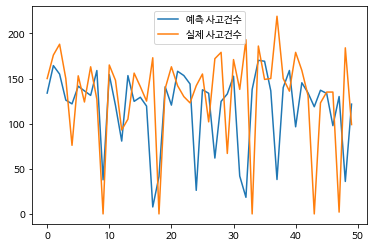

In [ ]:
#50번 예측결과 시각화
import matplotlib.pyplot as plt

plt.plot(rf_model.predict(X_test[:50]), label="예측 사고건수")
plt.plot(y_test[:50].values.ravel(), label="실제 사고건수")
plt.legend()
plt.show()

In [ ]:
rf_model.predict([[3.55,-2.3]])

array([79.01])

In [ ]:
# User input 부분 - 데이터가들어오는곳 
input = [[33, -12]]

In [ ]:
# 결과
rf_model.predict(input) 

array([156.66])